In [30]:
import numpy as np

from student_client import create_student_gym_env

step_size = 10
env = create_student_gym_env(step_size=step_size)



2026-02-06 18:13:49,127 - student_client.student_gym_env - WARNING - No .env file found and no explicit parameters provided. Using default values. For better setup, create a .env file with:
SERVER_URL=http://localhost:8001
USER_TOKEN=student_user
ENV_TYPE=DegradationEnv
MAX_STEPS_PER_EPISODE=1000
AUTO_RESET=True
TIMEOUT=30.0
2026-02-06 18:13:49,152 - student_client.student_gym_env - INFO - Created new session: 160ad120-3e55-4305-bc30-d0d034dc3de9
2026-02-06 18:13:50,078 - student_client.student_gym_env - INFO - Created new episode: 2e3a6eb8-a410-417a-9bfd-a39ba5170eaf
2026-02-06 18:13:50,078 - student_client.student_gym_env - INFO - StudentGymEnv initialized with episode 2e3a6eb8-a410-417a-9bfd-a39ba5170eaf


In [31]:
# Reset environment to get initial observation
obs, info = env.reset()
print(f"📋 Starting episode {info.get('episode_id', 'unknown')}")

obs.shape, info

2026-02-06 18:13:50,959 - student_client.student_gym_env - INFO - Episode 2e3a6eb8-a410-417a-9bfd-a39ba5170eaf reset successfully


📋 Starting episode 2e3a6eb8-a410-417a-9bfd-a39ba5170eaf


((9,),
 {'step': 0,
  'episode_id': '2e3a6eb8-a410-417a-9bfd-a39ba5170eaf',
  'terminated': False,
  'truncated': False})

In [32]:

# Initialize data collection arrays
observations = []
actions = []
rewards = []
total_timesteps = 0


for step in range(50):
    #time.sleep(2)

    # Choose a random action (0=do nothing, 1=repair, 2=sell)
    action = env.action_space.sample()
    action = 0

    if step % 4 == 0 and step > 0:
        action = 1
    if step >= 30:
        action = 2

    # Take step in environment
    #obs, reward, terminated, truncated, info = env.step(action, step_size=10, return_all_states=True)

    obs_result, reward, terminated, truncated, info = env.step(
        action=action, step_size=step_size, return_all_states=True
    )

    # Handle the observation result
    if isinstance(obs_result, list):
        # Multiple observations returned
        observations.extend(obs_result)
        # Action is applied at the first timestep of this interval
        actions.append(action)
        if action != 2:
            actions.extend([0] * (len(obs_result)-1)) # fill with no actions
    else:
        actions.append(action)

    rewards.append(reward)

    # Update total timesteps - server advances by step_size but returns only final observation
    total_timesteps += step_size

    # Print progress every step
    if step % 1 == 0:
        print(f" Step {total_timesteps}: Reward={reward:.2f}, Total={sum(rewards):.2f}")

    # Check if episode ended
    if terminated or truncated:
        print(f"🏁 Episode ended at step {total_timesteps} with reward={reward:.2f}")
        break


# Print summary statistics
total_reward = sum(rewards)
print(f"\n Episode Summary:")
print(f"   Total Steps: {len(actions)}")
print(f"   Total Reward: {total_reward:.2f}")
print(f"   Actions Taken: {len([a for a in actions if a == 1])} repairs, {len([a for a in actions if a == 2])} sell")

# Finish episode
env.close()

 Step 10: Reward=462.03, Total=462.03
 Step 20: Reward=409.60, Total=871.63
 Step 30: Reward=386.44, Total=1258.07
 Step 40: Reward=341.44, Total=1599.51
 Step 50: Reward=-497.19, Total=1102.32
 Step 60: Reward=446.19, Total=1548.51
 Step 70: Reward=396.84, Total=1945.35
 Step 80: Reward=317.56, Total=2262.91
 Step 90: Reward=-707.50, Total=1555.41
 Step 100: Reward=267.17, Total=1822.59
 Step 110: Reward=214.02, Total=2036.61
 Step 120: Reward=166.26, Total=2202.88
 Step 130: Reward=-631.22, Total=1571.66
 Step 140: Reward=312.50, Total=1884.16
 Step 150: Reward=260.65, Total=2144.80
 Step 160: Reward=217.71, Total=2362.51
 Step 170: Reward=-642.11, Total=1720.40
 Step 180: Reward=292.72, Total=2013.12
 Step 190: Reward=229.89, Total=2243.01
 Step 200: Reward=195.24, Total=2438.25
 Step 210: Reward=-604.82, Total=1833.43
 Step 220: Reward=309.58, Total=2143.01
 Step 230: Reward=289.13, Total=2432.15
 Step 240: Reward=198.63, Total=2630.78
 Step 250: Reward=-598.53, Total=2032.25
 Step

2026-02-06 18:14:26,613 - student_client.student_gym_env - INFO - Closed environment 2e3a6eb8-a410-417a-9bfd-a39ba5170eaf


 Step 300: Reward=353.33, Total=2508.40
Episode 2e3a6eb8-a410-417a-9bfd-a39ba5170eaf reached termination state, reason: sold
 Step 310: Reward=118.21, Total=2626.61
🏁 Episode ended at step 310 with reward=118.21

 Episode Summary:
   Total Steps: 301
   Total Reward: 2626.61
   Actions Taken: 7 repairs, 1 sell


In [33]:
len(observations), len(actions)

(301, 301)

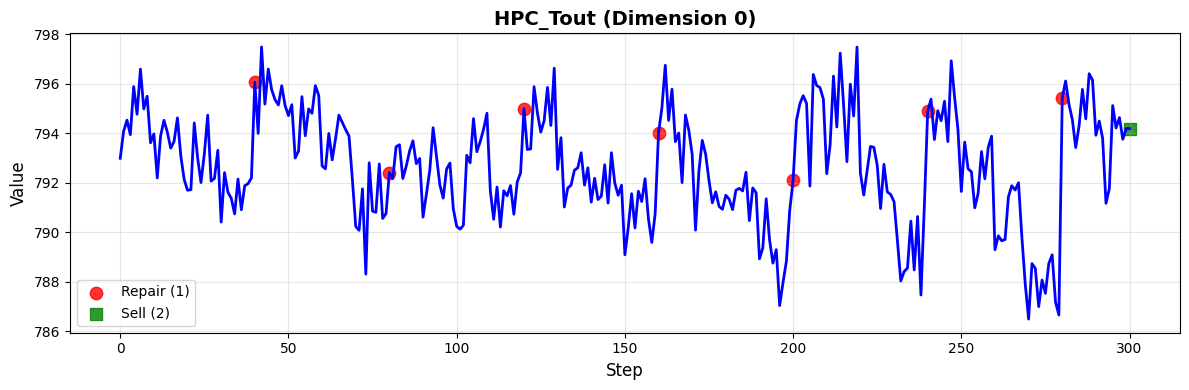

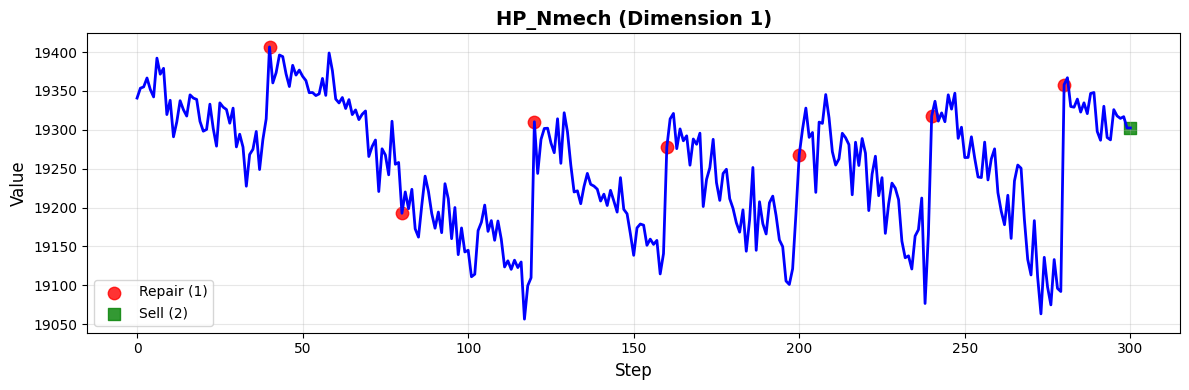

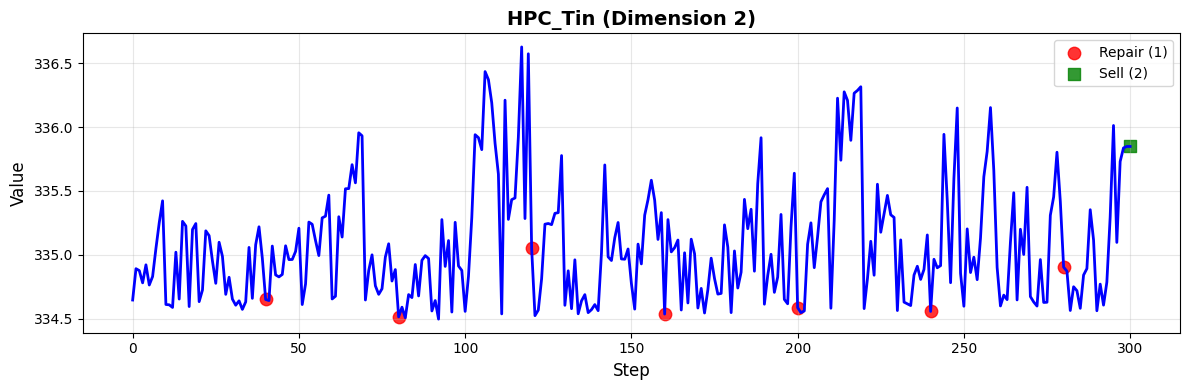

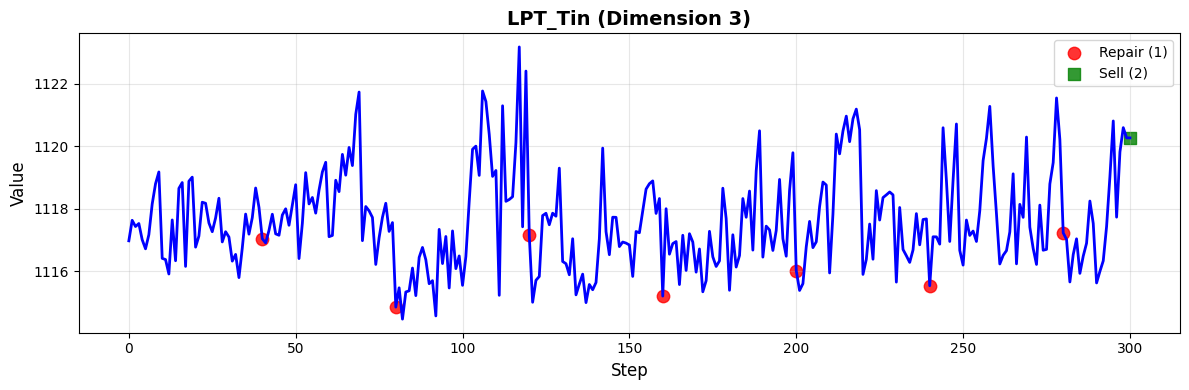

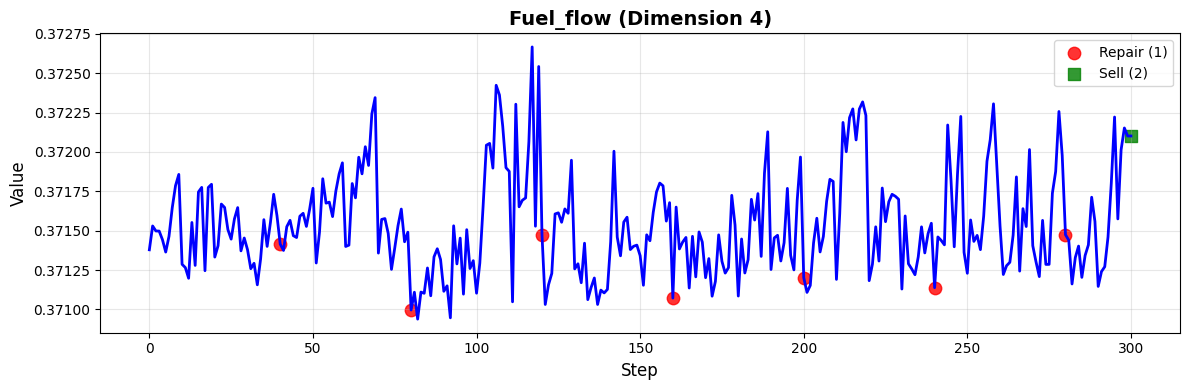

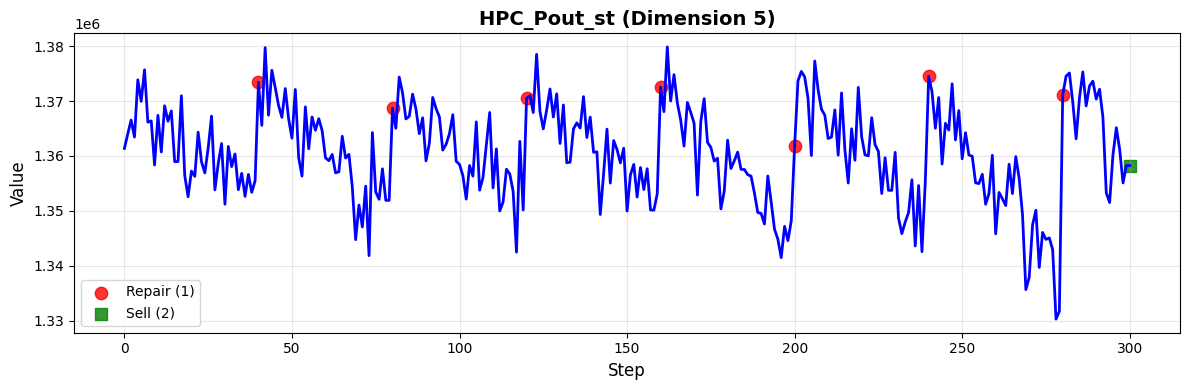

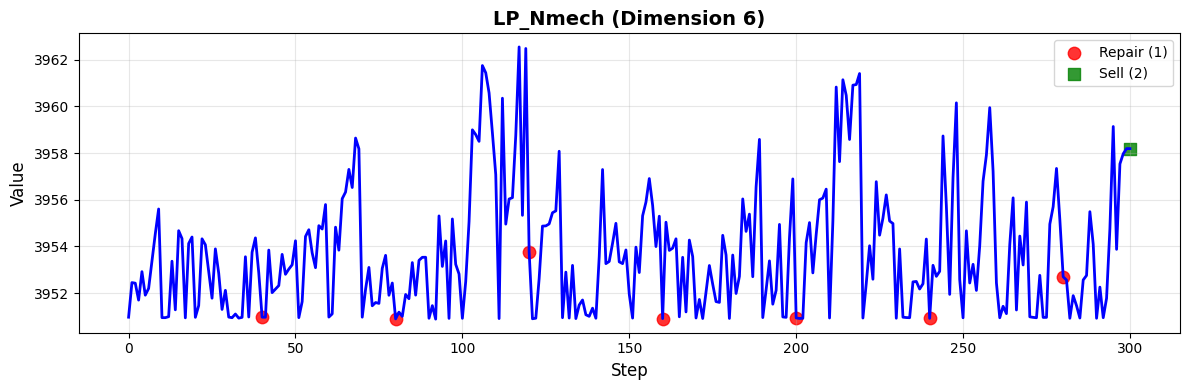

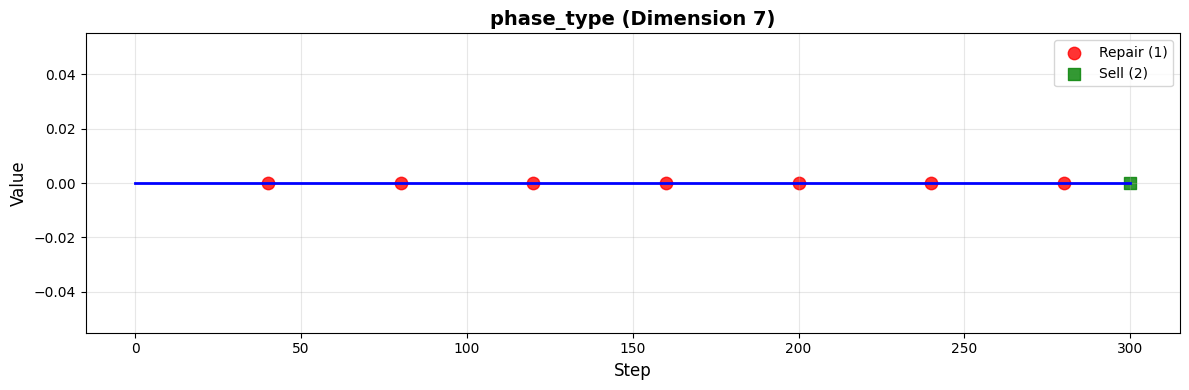

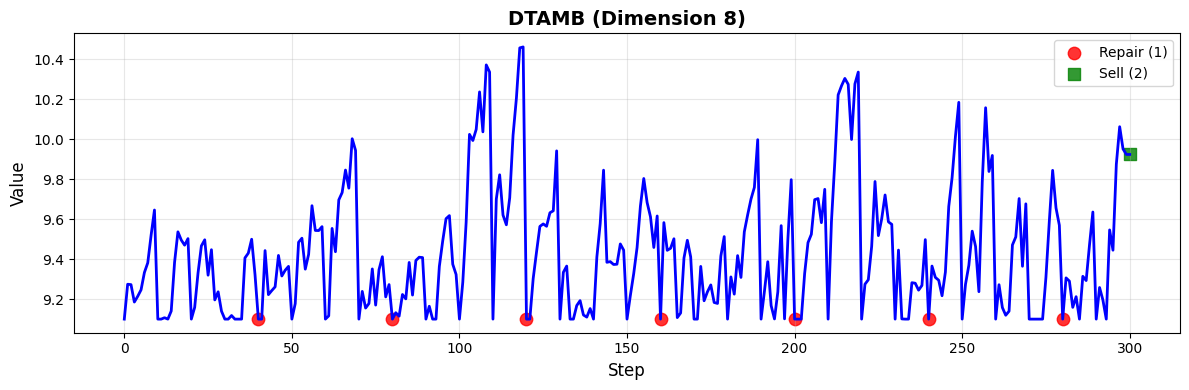

In [34]:
from student_client.plotting import plot_observations

plot_observations(
        observations=observations,
        actions=actions,
        title="Simple Policy - Observation Dimensions Over Time"
    )

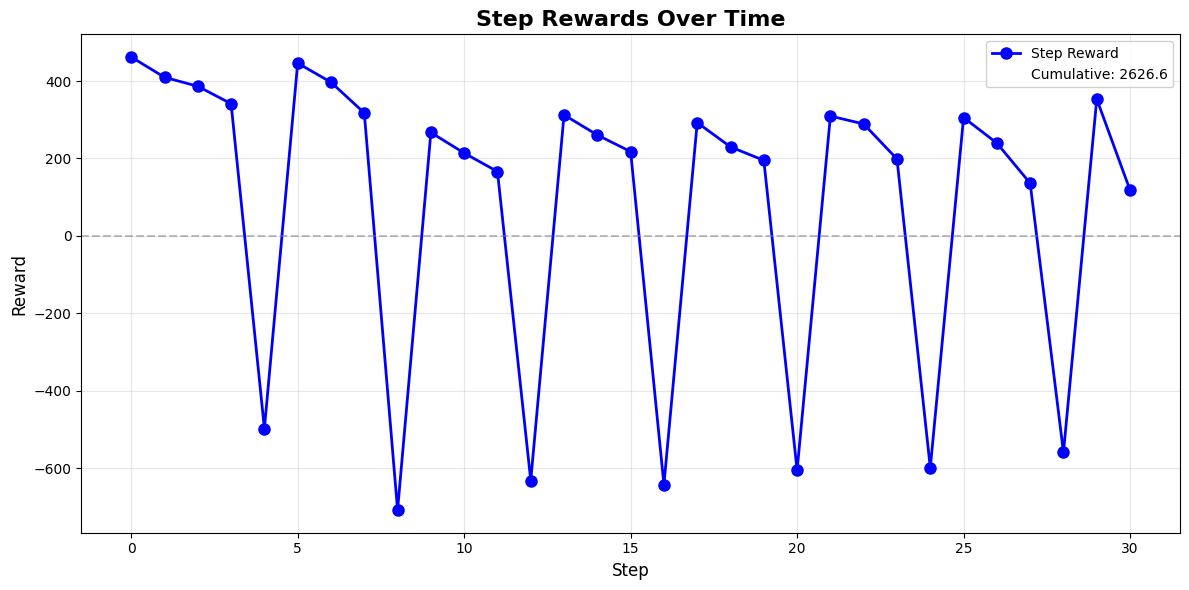

📊 Reward Statistics:
   Total Steps: 31
   Total Reward: 2626.61
   Average Reward: 84.73
   Max Reward: 462.03
   Min Reward: -707.50


In [35]:
from student_client.plotting import plot_rewards

plot_rewards(rewards=rewards)